# Mission Atlantic - CS SOMAR
## Data treatment for ICCAT T2CE database
### author: Henrique Amato Peres - ha.peres@usp.br

Import necessary packages:

In [3]:
#! -*- coding: utf-8 -*-

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

Open .csv file containing ICCAT T2CE database sliced geographically to the South Atlantic basin and load it as a pandas DataFrame:

In [4]:
with open('iccat_t2ce_SAt_allgr_3nov21.csv') as csvfile:
    f = list(csv.reader(csvfile))

headers = f[0]
df = pd.DataFrame(f[1:], columns=headers)
del(f)

Define data types for each column and slice to begin in 2012, similar to the temporal range of the Global Fishing Watch database:

In [5]:
species_list = ['BFT', 'ALB', 'YFT', 'BET', 'SKJ', 'SWO', 'BUM', 'SAI', 'SPF', 'WHM', 'BLF', 'BLT', 'BON', 
                'BOP', 'BRS', 'CER', 'FRI', 'KGM', 'LTA', 'MAW', 'SLT', 'SSM', 'WAH', 'DOL', 'BIL', 'BLM', 
                'MSP', 'MLS', 'RSP', 'SBF', 'oTun', 'BSH', 'POR', 'SMA', 'oSks']

for var in ['Eff1', 'Eff2', 'BFT', 'ALB', 'YFT', 'BET', 'SKJ', 'SWO', 'BUM', 'SAI', 'SPF', 'WHM', 'BLF', 
            'BLT', 'BON', 'BOP', 'BRS', 'CER', 'FRI', 'KGM', 'LTA', 'MAW', 'SLT', 'SSM', 'WAH', 'DOL', 
            'BIL', 'BLM', 'MSP', 'MLS', 'RSP', 'SBF', 'oTun', 'BSH', 'POR', 'SMA', 'oSks']:
    df[var] = pd.to_numeric(df[var], errors='coerce')

df = df.astype({'StrataID': 'int64', 'DSetID': 'int64', 'FleetID': 'string', 'GearGrpCode': 'string', 
                'GearCode': 'string', 'FileTypeCode': 'string', 'YearC': 'int64', 'TimePeriodID': 'int64', 
                'SquareTypeCode': 'string', 'QuadID': 'int64', 'Lat': 'float64', 'Lon': 'float64', 
                'SchoolTypeCode': 'string', 'Eff1': 'float64', 'Eff1Type': 'string', 'Eff2': 'float64', 
                'Eff2Type': 'string', 'DSetTypeID': 'string', 'CatchUnit': 'string', 'BFT': 'float64', 
                'ALB': 'float64', 'YFT': 'float64', 'BET': 'float64', 'SKJ': 'float64', 'SWO': 'float64', 
                'BUM': 'float64', 'SAI': 'float64', 'SPF': 'float64', 'WHM': 'float64', 'BLF': 'float64', 
                'BLT': 'float64', 'BON': 'float64', 'BOP': 'float64', 'BRS': 'float64', 'CER': 'float64', 
                'FRI': 'float64', 'KGM': 'float64', 'LTA': 'float64', 'MAW': 'float64', 'SLT': 'float64', 
                'SSM': 'float64', 'WAH': 'float64', 'DOL': 'float64', 'BIL': 'float64', 'BLM': 'float64', 
                'MSP': 'float64', 'MLS': 'float64', 'RSP': 'float64', 'SBF': 'float64', 'oTun': 'float64', 
                'BSH': 'float64', 'POR': 'float64', 'SMA': 'float64', 'oSks': 'float64'})

df = df[df['YearC'] > 2011]

Legend for species code:
<br/><br/>

##### Tuna (major species)

BFT: Atlantic bluefin tuna, *Thunnys thynnus*

ALB: Albacore, *Thunnus alalunga*

YFT: Yellowfin tuna, *Thunnus albacares*

BET: Bigeye tuna, *Thunnus obesus*

SKJ: Skipjack tuna, *Katsuwonus pelamis*

SWO: Swordfish, *Xiphias gladius*

BUM: Blue marlin, *Makaira nigricans*

SAI: Atlantic sailfish, *Istiophorus albicans*

SPF: Longbill spearfish, *Tetrapturus pfluegeri*

WHM: White marlin, *Tetrapturus albidus*
<br/><br/>
##### Tuna (small tuna)

BLF: Blackfin tuna, *Thunnus atlanticus*

BLT: Bullet tuna, *Auxis rochei*

BON: Atlantic bonito, *Sarda sarda*

BOP: Plain bonito, *Orcynopsis unicolor*

BRS: Serra Spanish mackerel, *Scomberomorus brasiliensis*

CER: Cero, *Scomberomorus regalis*

FRI: Frigate tuna, *Auxis thazard*

KGM: King mackerel, *Scomberomorus cavalla*

LTA: Little tunny (= Atl. black skipj), *Euthynnus alletteratus*

MAW: West African Spanish mackerel, *Scomberomorus tritor*

SLT: Slender tuna, *Allothunnus fallai*

SSM: Atlantic Spanish mackerel, *Scomberomorus maculatus*

WAH: Wahoo, *Acanthocybium solandri*

DOL: Common dolphinfish, *Coryphaena hippurus*
<br/><br/>
##### Tuna (other species)

BIL: Marlins, sailfishes, etc., Istiophoridae

BLM: Black marlin, *Makaira indica*

MSP: Mediterranean spearfish, *Tetrapturus belone*

MLS: Striped marlin, *Tetrapturus audax*

RSP: Roundscale spearfish, *Tetrapturus georgii*

SBF: Southern bluefin tuna, *Thunnus maccoyii*

oTun: Other tuna species
<br/><br/>
##### Sharks (major species)

BSH: Blue shark, *Prionace glauca*

POR: Porbeagle, *Lamna nasus*

SMA: Shortfin mako, *Isurus oxyrinchus*

oSks: Other shark species

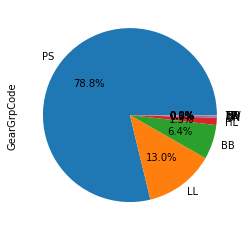

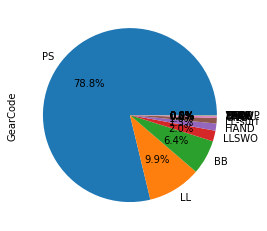

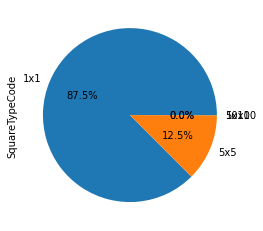

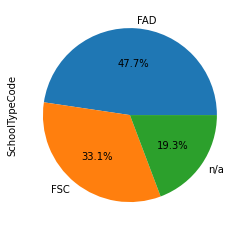

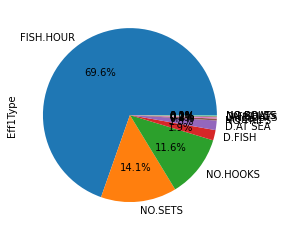

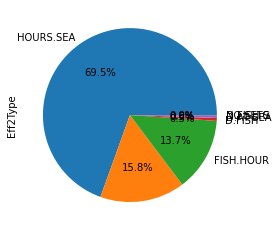

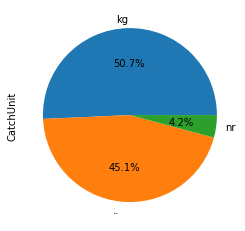

<Figure size 432x288 with 0 Axes>

In [6]:
for var in ['GearGrpCode', 'GearCode', 'SquareTypeCode', 'SchoolTypeCode', 'Eff1Type', 
            'Eff2Type', 'CatchUnit']:
    df[var].value_counts().plot.pie(autopct='%.1f%%')
    plt.show()
    plt.clf()

Legend for gear code:
<br/><br/>
PS: Purse seine

LL: Longline

BB: Baiboat

LLSWO: Longline, targetting SWO (used by Italy)

HAND: Handline

LL-surf: Longline, surface (used by Italy)

GILL: Gillnet, drift net

UNCL: Unclassified, gears not reported

TRAW: Trawl

LLJAP: Longline, japanese (Spain)

TROL: Trolling

SPOR: Sport, recreational fisheries (mostly rod and reel)

TRAWP: Trawl, mid-water pelagic trawl (= MWT)

HS: Haul seine

PSFS: Purne seine, catching small fish

SURF: Surface fisheries unclassified

In [17]:
for i in df:
    print(df[i].value_counts())

917504     1
920811     1
955640     1
847095     1
980212     1
          ..
940638     1
1016762    1
944728     1
922199     1
921598     1
Name: StrataID, Length: 94848, dtype: int64
5478    3216
6835    3036
6065    2998
5854    2978
6761    2924
        ... 
5544       1
7103       1
8058       1
6407       1
6229       1
Name: DSetID, Length: 221, dtype: int64
021ES06    21755
008FR04    14464
076CW01     9527
027GH03     7521
027GH04     5989
028PA02     5624
065CV99     5608
197SV01     5188
196GT01     5112
053SN04     4548
134BZ99     2932
003BR00     2046
105GN01     1537
050CI04      760
050CI01      744
028PA05      572
061SH00      175
053SN02      159
020ZA00      131
134BZ00       84
053SN03       56
134CI00       39
065CV00       38
028PA06       32
113NA00       31
061SH01       29
020JP00       27
050CI00       24
027GH00       24
053SN01       21
053SN05       21
104RU00       13
029VE00       10
053SN00        6
019PT03        1
Name: FleetID, dtype: Int64
PS    8

### Exploring species and gears
#### ALB

In [ ]:
df_2 = df[df['GearGrpCode']=='LL']


#### Plotting
Create 1x1° grid and plot:

In [10]:
Lon = np.arange(-46, 13, 1)
Lat = np.arange(-31, 16, 1)

/home/henrique/.local/lib/python3.8/site-packages/matplotlib/colors.py:1543: RuntimeWarning: invalid value encountered in less_equal
  super().autoscale_None(np.ma.array(A, mask=(A <= 0)))


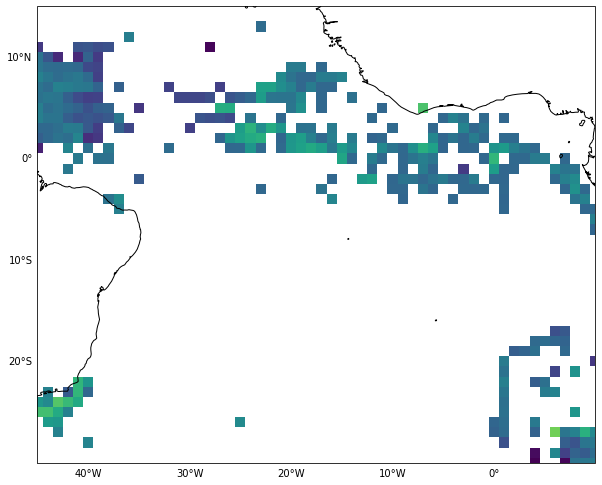

In [16]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, figsize=(10,10), subplot_kw=dict(projection=proj))
ax.coastlines()
ax.set_extent([-45, 10, -30, 15], crs=proj)
gl = ax.gridlines(alpha=0, draw_labels=True)
gl.top_labels = False
gl.right_labels = False

species = 'ALB'
df = df[df['SquareTypeCode']=='1x1']
sum_catch = df.groupby(['Lon', 'Lat'], as_index=False)[species].sum()

C = np.empty((len(Lon), len(Lat)))
C[:] = np.nan

for i, lo in enumerate(Lon):
    for j, la in enumerate(Lat):
        catch = sum_catch[sum_catch['Lon']==lo+.5]
        catch = catch[catch['Lat']==la+.5]
        try:
            catch2 = catch.iat[0,2]
        except IndexError:
            pass
        else:
            catch2 = catch.iat[0,2]
            if catch2 > 0:
                C[i,j] = catch2
                
cm = ax.pcolormesh(Lon, Lat, C.T, norm=mcolors.LogNorm(vmin=1e1, vmax=1e7))